<a href="https://colab.research.google.com/github/BoshithaMGunarathna/Mental-Health-Prediction/blob/main/Compressed_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Create a dataframe with the model evaluation metrics
models = ["Logistic Regression", "XGBoost", "Decision Tree"]


In [27]:
# Extract accuracy values
accuracy = [0.70, 0.828141225337487, 0.6778702542469501]

In [28]:
# Extract precision values for class 1 (needs treatment)
precision = [0.70, 0.85, 0.72]

# Extract recall values for class 1 (needs treatment)
recall = [0.72, 0.89, 0.60]

# Extract f1-score values for class 1 (needs treatment)
f1_score = [0.71, 0.87, 0.65]

# Additional metrics available for some models
roc_auc = [0.7557043239989651, 0.8817862507984199, np.nan]

In [46]:
# Create the dataframe
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'ROC-AUC': roc_auc
})

print("Model Comparison Metrics:")
print(results_df)

Model Comparison Metrics:
                 Model  Accuracy  Precision  Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.700000       0.70    0.72      0.71  0.755704
1              XGBoost  0.828141       0.85    0.89      0.87  0.881786
2        Decision Tree  0.677870       0.72    0.60      0.65       NaN


In [47]:
# Set the style for the plots
plt.style.use('ggplot')

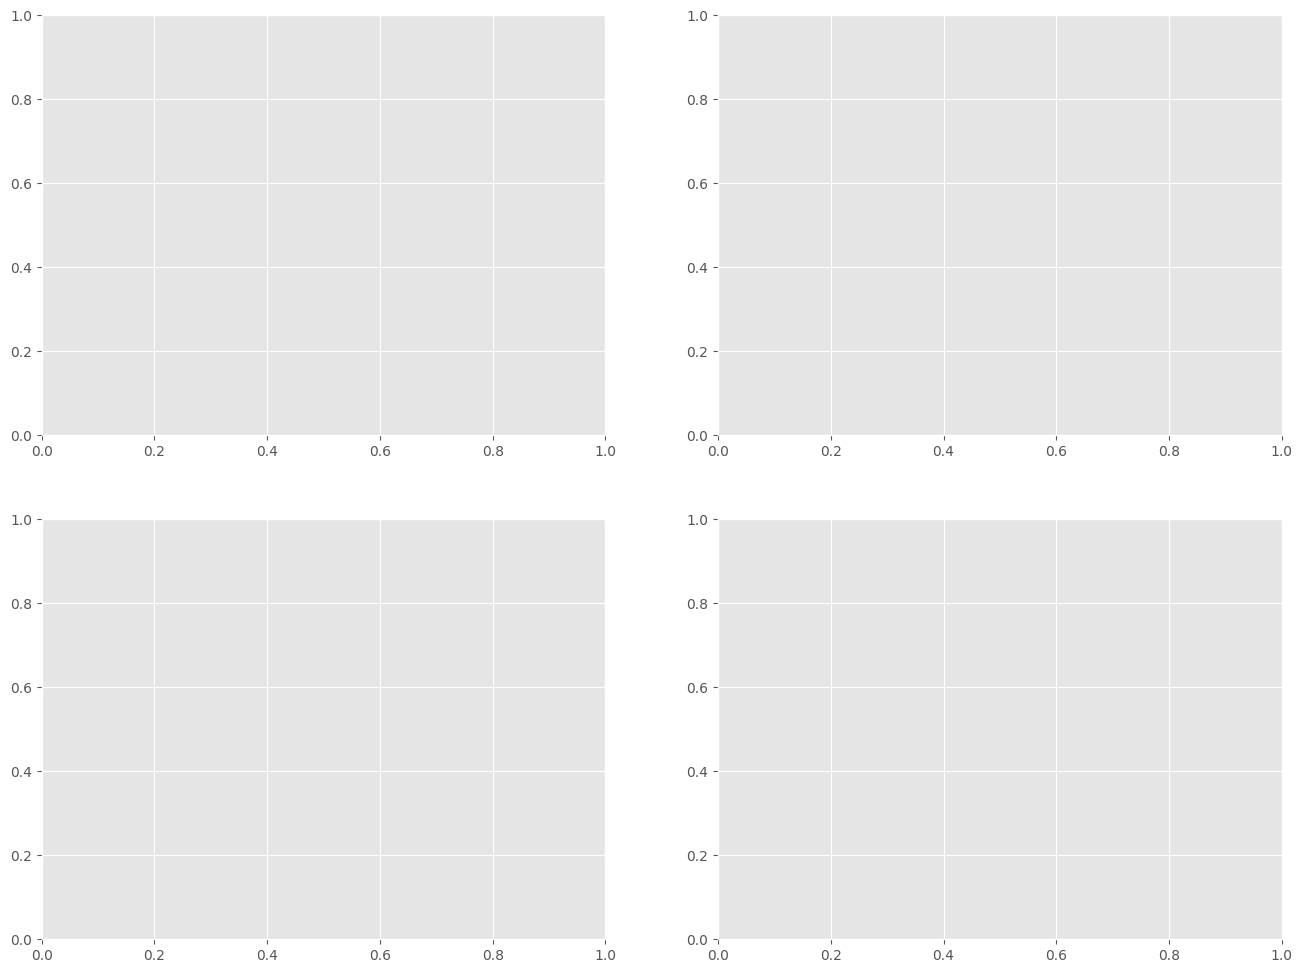

In [48]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

In [49]:
# Plot accuracy
axs[0, 0].bar(results_df['Model'], results_df['Accuracy'], color=['blue', 'green', 'orange'])
axs[0, 0].set_title('Model Comparison - Accuracy', fontsize=14)
axs[0, 0].set_xlabel('Model', fontsize=12)
axs[0, 0].set_ylabel('Accuracy', fontsize=12)
axs[0, 0].set_ylim(0, 1)
for i, v in enumerate(results_df['Accuracy']):
    axs[0, 0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
axs[0, 0].grid(axis='y')


In [50]:
# Plot precision and recall
bar_width = 0.35
x = np.arange(len(models))
axs[0, 1].bar(x - bar_width/2, results_df['Precision'], bar_width, label='Precision', color='blue')
axs[0, 1].bar(x + bar_width/2, results_df['Recall'], bar_width, label='Recall', color='red')
axs[0, 1].set_title('Precision vs Recall', fontsize=14)
axs[0, 1].set_xlabel('Model', fontsize=12)
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models)
axs[0, 1].set_ylim(0, 1)
axs[0, 1].legend()
axs[0, 1].grid(axis='y')

In [51]:
# Plot F1-Score
axs[1, 0].bar(results_df['Model'], results_df['F1-Score'], color=['blue', 'green', 'orange'])
axs[1, 0].set_title('Model Comparison - F1-Score', fontsize=14)
axs[1, 0].set_xlabel('Model', fontsize=12)
axs[1, 0].set_ylabel('F1-Score', fontsize=12)
axs[1, 0].set_ylim(0, 1)
for i, v in enumerate(results_df['F1-Score']):
    axs[1, 0].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
axs[1, 0].grid(axis='y')

In [52]:
# Plot ROC-AUC for models where it's available
roc_models = results_df[results_df['ROC-AUC'].notna()]['Model'].tolist()
roc_values = [float(v) for v in results_df[results_df['ROC-AUC'].notna()]['ROC-AUC'].tolist()]

In [53]:
axs[1, 1].bar(roc_models, roc_values, color=['blue', 'green'])
axs[1, 1].set_title('Model Comparison - ROC-AUC', fontsize=14)
axs[1, 1].set_xlabel('Model', fontsize=12)
axs[1, 1].set_ylabel('ROC-AUC', fontsize=12)
axs[1, 1].set_ylim(0, 1)
for i, v in enumerate(roc_values):
    axs[1, 1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
axs[1, 1].grid(axis='y')

In [54]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

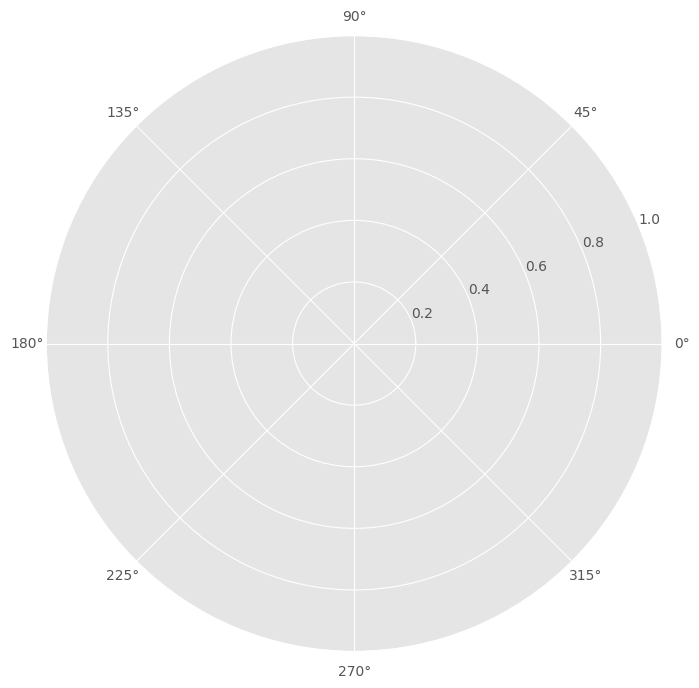

In [55]:
# Create a spider/radar chart to compare all metrics at once
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
model_values = results_df[metrics].values

# Create a figure for the radar chart
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Define the angles for each metric
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# Define colors for each model
colors = ['b', 'g', 'orange']
markers = ['o', 's', '^']

In [56]:
# Plot each model
for i, model in enumerate(models):
    values = model_values[i].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=colors[i], linewidth=2, marker=markers[i], label=model)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

<ipython-input-57-5a83aaa391c0>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


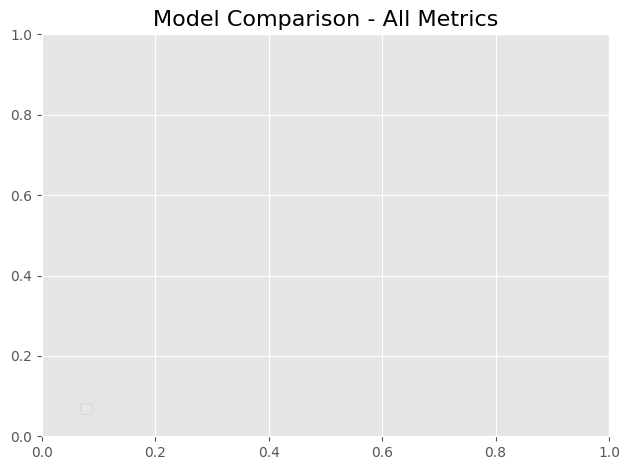

In [57]:
# Set the labels and formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_ylim(0, 1)
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Model Comparison - All Metrics', fontsize=16)

plt.tight_layout()
plt.show()

In [58]:
# Create a comprehensive summary table with rankings
def rank_models(values):
    """Return the ranks of values (1 is best)"""
    return pd.Series(values).rank(ascending=False).tolist()

# Add rankings for each metric
results_df['Accuracy_Rank'] = rank_models(results_df['Accuracy'])
results_df['Precision_Rank'] = rank_models(results_df['Precision'])
results_df['Recall_Rank'] = rank_models(results_df['Recall'])
results_df['F1Score_Rank'] = rank_models(results_df['F1-Score'])  # Fixed this line

In [59]:
# Calculate average rank
results_df['Avg_Rank'] = results_df[['Accuracy_Rank', 'Precision_Rank', 'Recall_Rank', 'F1Score_Rank']].mean(axis=1)  # Fixed this line

# Sort by average rank
results_df_sorted = results_df.sort_values('Avg_Rank')

In [60]:
print("\nModel Rankings (lower is better):")
print(results_df_sorted[['Model', 'Accuracy_Rank', 'Precision_Rank', 'Recall_Rank', 'F1Score_Rank', 'Avg_Rank']])  # Fixed this line

# Determine the best model
best_model = results_df_sorted.iloc[0]['Model']
print(f"\nThe best overall model is: {best_model}")


Model Rankings (lower is better):
                 Model  Accuracy_Rank  Precision_Rank  Recall_Rank  \
1              XGBoost            1.0             1.0          1.0   
0  Logistic Regression            2.0             3.0          2.0   
2        Decision Tree            3.0             2.0          3.0   

   F1Score_Rank  Avg_Rank  
1           1.0      1.00  
0           2.0      2.25  
2           3.0      2.75  

The best overall model is: XGBoost


In [61]:
# Create a final visual comparison
plt.figure(figsize=(12, 6))
metrics_for_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
X = np.arange(len(metrics_for_plot))
width = 0.25

<Figure size 1200x600 with 0 Axes>

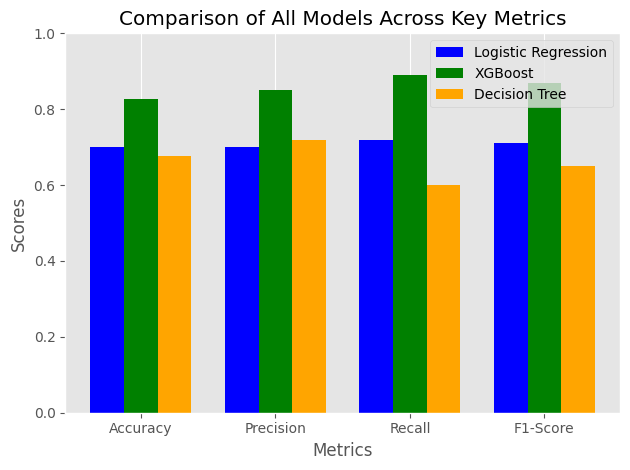

In [62]:
plt.bar(X - width, results_df.iloc[0][metrics_for_plot], width, label=results_df.iloc[0]['Model'], color='blue')
plt.bar(X, results_df.iloc[1][metrics_for_plot], width, label=results_df.iloc[1]['Model'], color='green')
plt.bar(X + width, results_df.iloc[2][metrics_for_plot], width, label=results_df.iloc[2]['Model'], color='orange')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of All Models Across Key Metrics')
plt.xticks(X, metrics_for_plot)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [63]:
# Final model recommendation
print("\nModel Recommendation Summary:")
print(f"Based on the comprehensive analysis of accuracy, precision, recall, and F1-score, the {best_model} model")
print("is recommended for predicting mental health treatment needs.")
print("\nKey strengths of this model:")

# Identify the strengths of the best model
best_idx = results_df[results_df['Model'] == best_model].index[0]

# Fixed this part to use the correct column names
if results_df.iloc[best_idx]['Accuracy_Rank'] == 1:
    print(f"- Highest Accuracy: {results_df.iloc[best_idx]['Accuracy']:.2f}")

if results_df.iloc[best_idx]['Precision_Rank'] == 1:
    print(f"- Highest Precision: {results_df.iloc[best_idx]['Precision']:.2f}")

if results_df.iloc[best_idx]['Recall_Rank'] == 1:
    print(f"- Highest Recall: {results_df.iloc[best_idx]['Recall']:.2f}")

if results_df.iloc[best_idx]['F1Score_Rank'] == 1:  # Fixed this line
    print(f"- Highest F1-Score: {results_df.iloc[best_idx]['F1-Score']:.2f}")

# Check if ROC-AUC is available and highest
if not pd.isna(results_df.iloc[best_idx]['ROC-AUC']):
    roc_ranks = rank_models(results_df['ROC-AUC'])
    if roc_ranks[best_idx] == 1:
        print(f"- Highest ROC-AUC: {results_df.iloc[best_idx]['ROC-AUC']:.2f}")



Model Recommendation Summary:
Based on the comprehensive analysis of accuracy, precision, recall, and F1-score, the XGBoost model
is recommended for predicting mental health treatment needs.

Key strengths of this model:
- Highest Accuracy: 0.83
- Highest Precision: 0.85
- Highest Recall: 0.89
- Highest F1-Score: 0.87
- Highest ROC-AUC: 0.88
